## Lab - Random Variable Distributions

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
numericals = customer_df.select_dtypes(np.number)
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [32]:
def continuous_plots(df):
    fig = plt.subplots(figsize=(10,10))
    for col in df:
        sns.histplot(df[col], kde=True)
        plt.show()

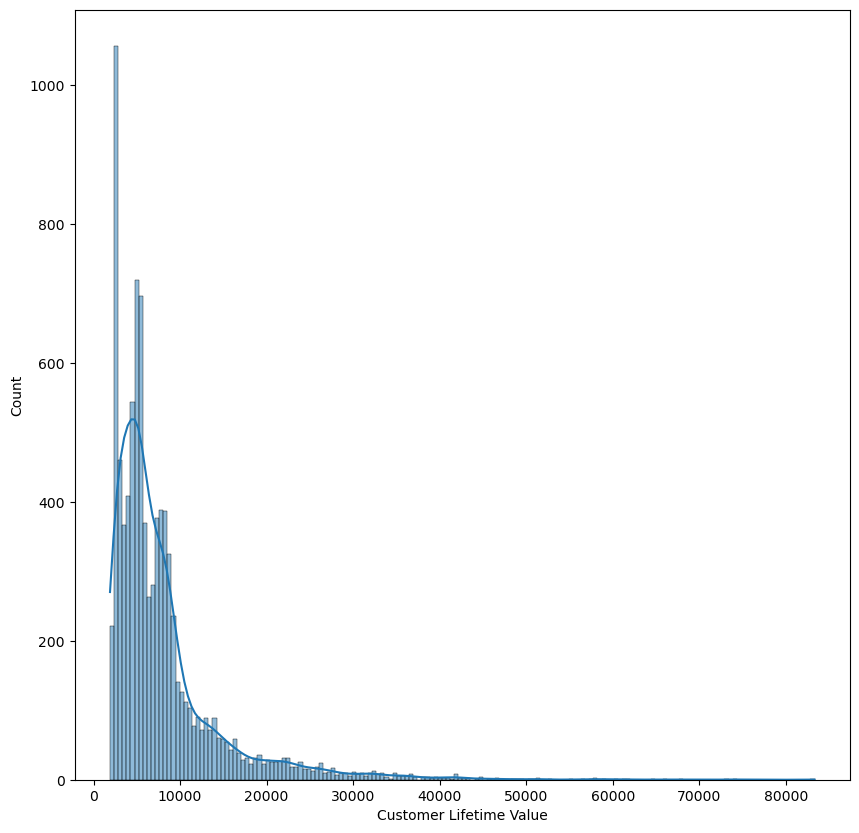

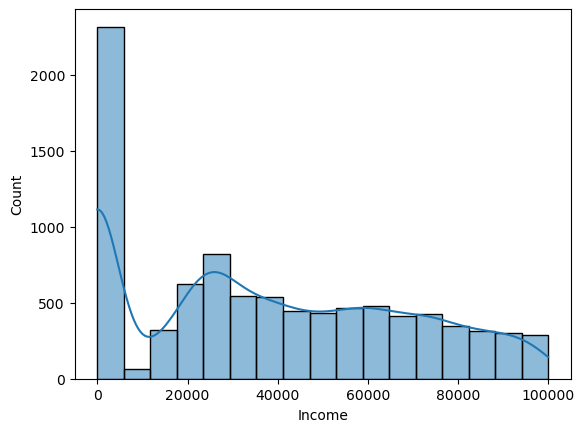

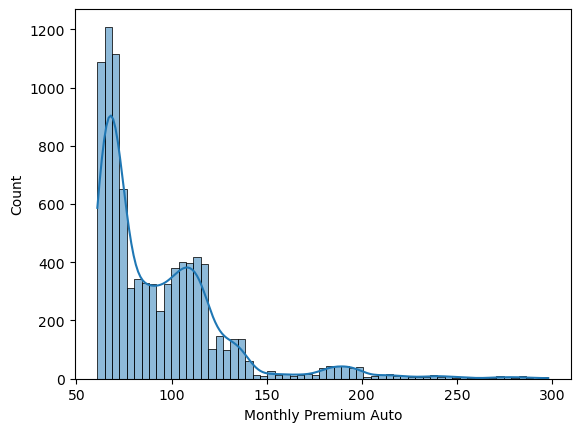

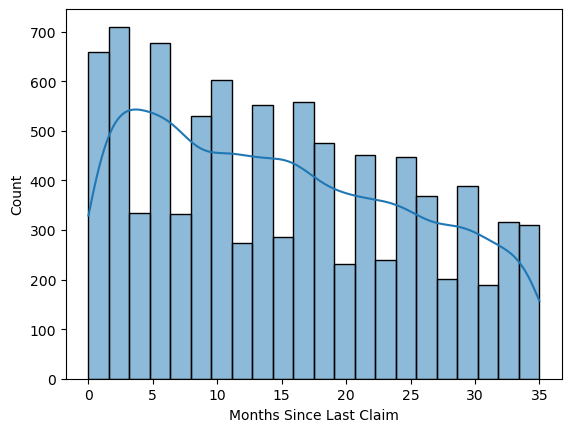

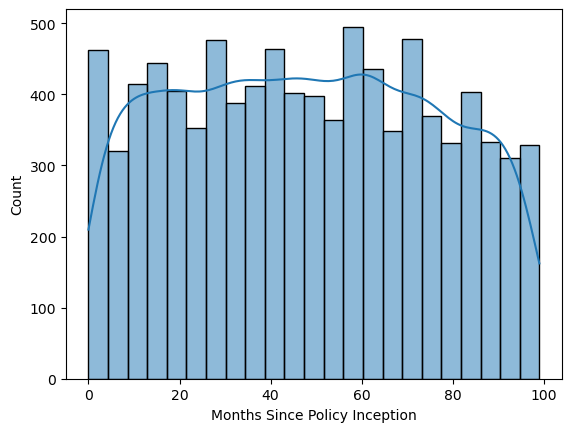

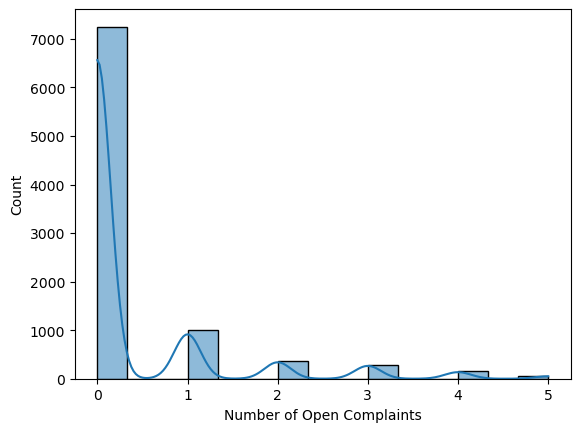

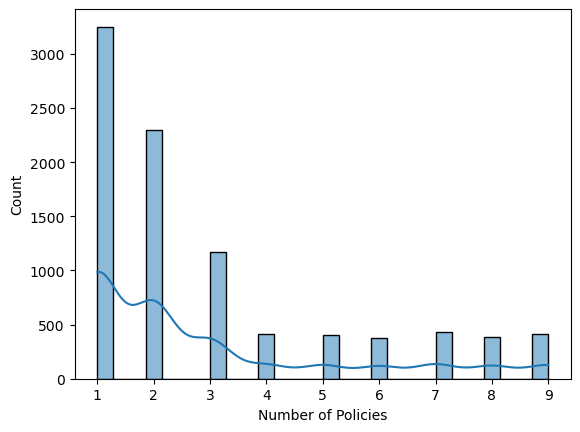

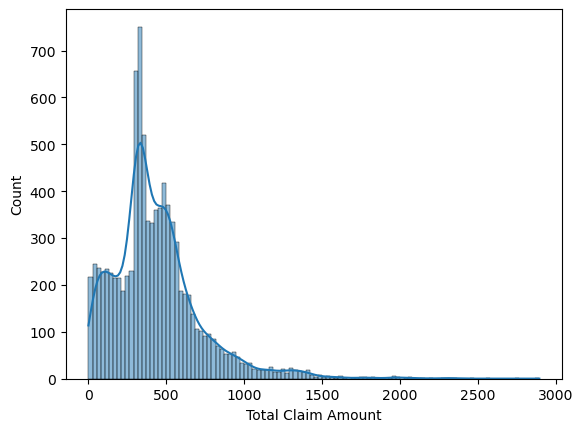

In [33]:
continuous_plots(numericals)

In [ ]:
#Majority follow an exponential distribution. 

In [ ]:
#Check if any of the distributions change the results.

In [42]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

transformer = PowerTransformer()
transformer.fit(numericals)
numericals_norm_np=transformer.transform(numericals)
numericals_norm=pd.DataFrame(numericals_norm_np, columns=numericals.columns)
numericals_norm.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03,9.134000e+03
mean,1.326010e-14,-1.620969e-16,3.672035e-14,-5.729791e-17,1.788706e-16,1.197616e-15,-9.372110e-16,-6.263996e-17
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-2.238398e+00,-1.641026e+00,-1.545512e+00,-1.952966e+00,-2.095014e+00,-5.092894e-01,-1.145850e+00,-2.821922e+00
25%,-6.678136e-01,-1.641026e+00,-9.268928e-01,-8.320561e-01,-7.939358e-01,-5.092894e-01,-1.145850e+00,-4.444204e-01
50%,-2.565738e-02,3.717483e-01,-1.582160e-02,5.622338e-02,9.401301e-02,-5.092894e-01,-5.842961e-02,3.195423e-03
75%,6.371485e-01,7.616907e-01,8.716402e-01,8.214777e-01,8.287709e-01,-5.092894e-01,8.847484e-01,5.477369e-01
max,2.811682e+00,1.112755e+00,2.270116e+00,1.660758e+00,1.636206e+00,2.026024e+00,1.670427e+00,4.749093e+00


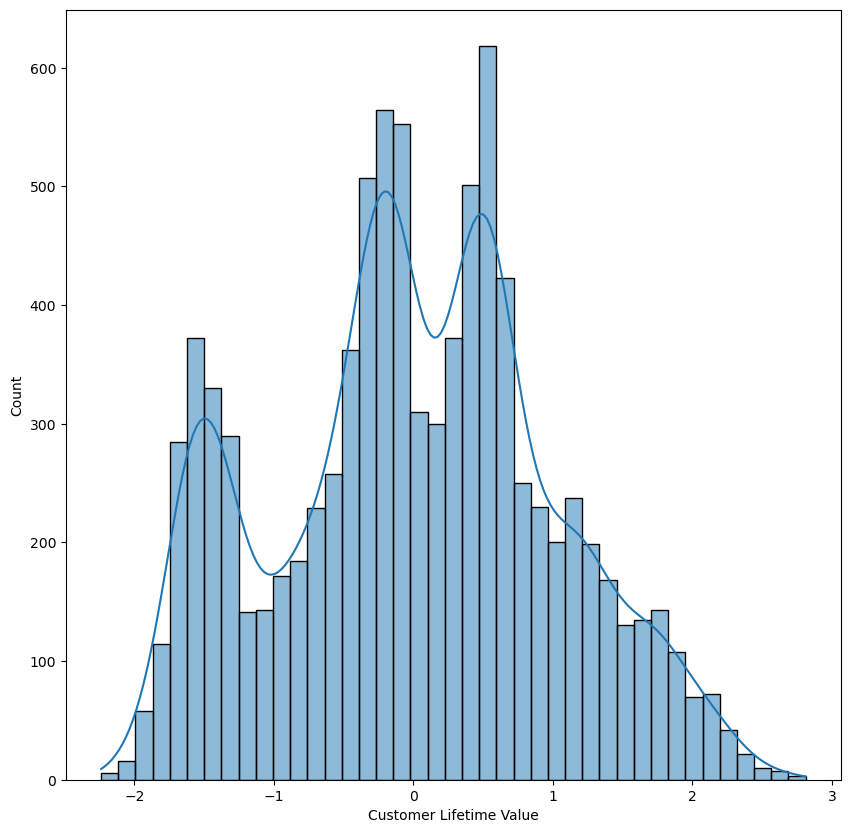

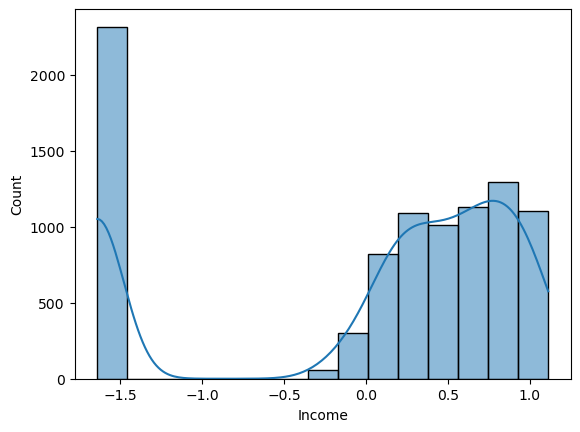

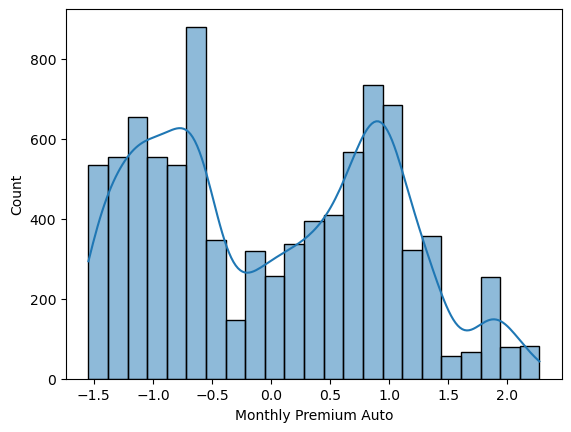

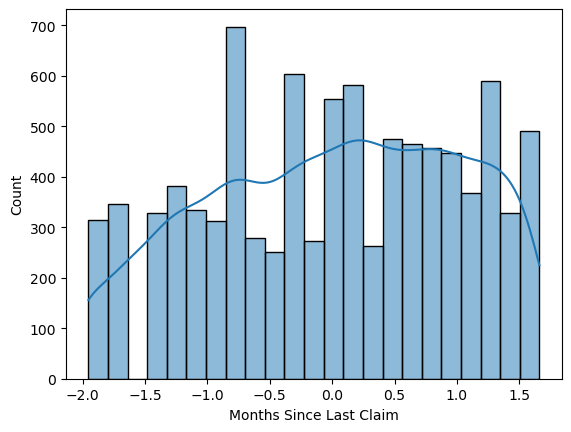

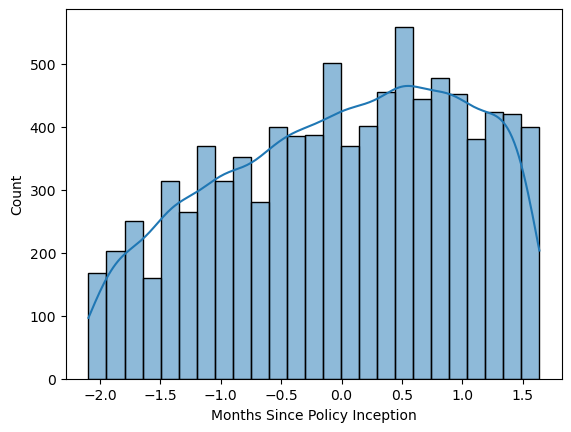

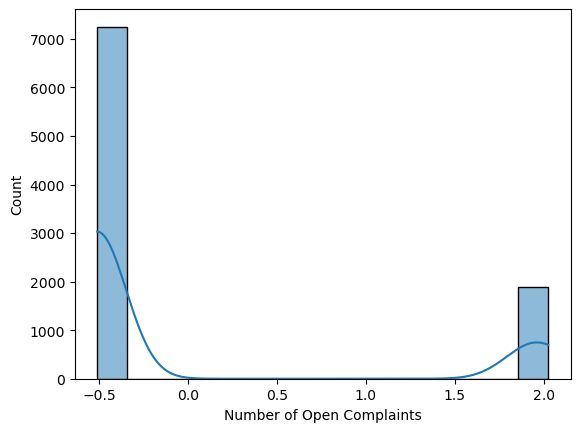

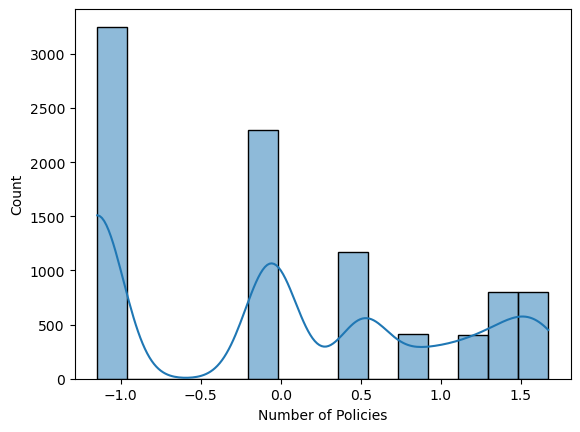

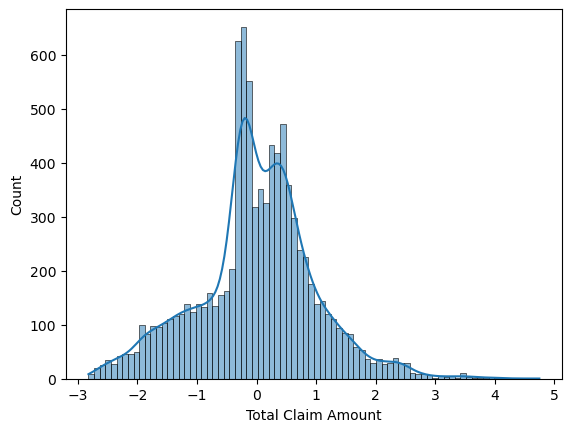

In [43]:
continuous_plots(numericals_norm)

In [ ]:
# Slight changes fitting a more normal distribution

In [54]:
def log_transform_clean(df):
    for col in df:
        df[col] = np.log10(df[col])
    return df

In [55]:
numericals_log = log_transform_clean(numericals)

/Users/natashabenson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/natashabenson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


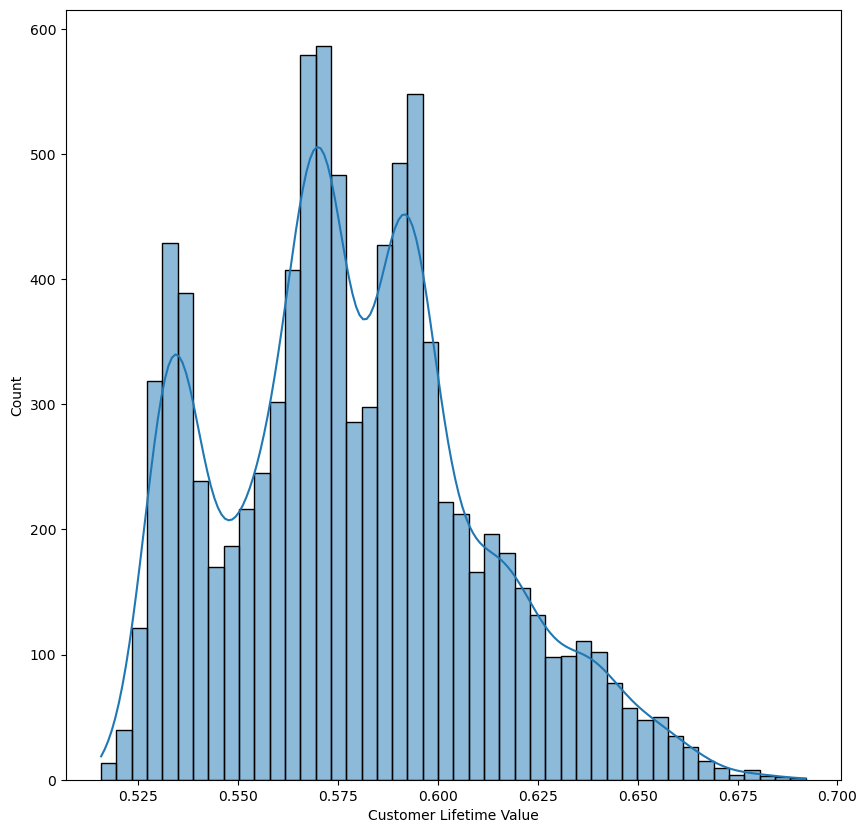

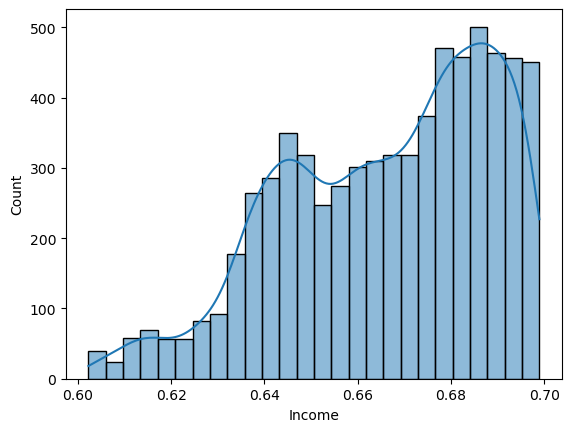

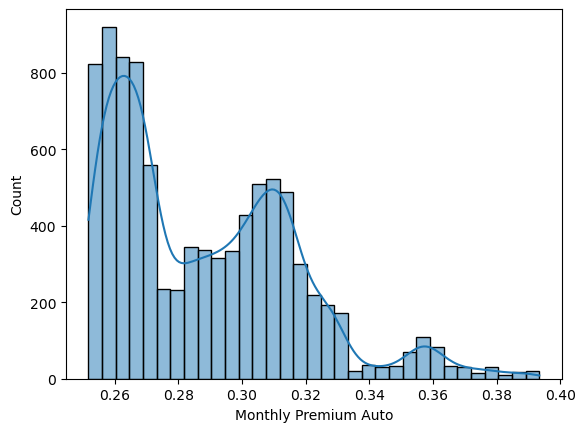

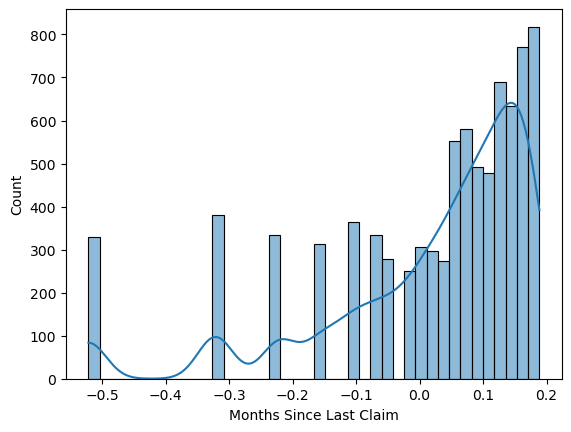

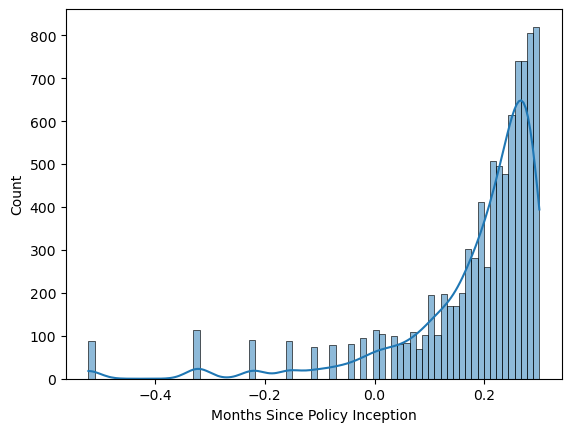

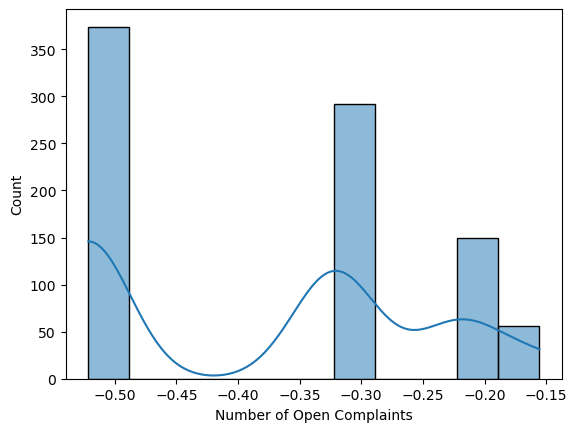

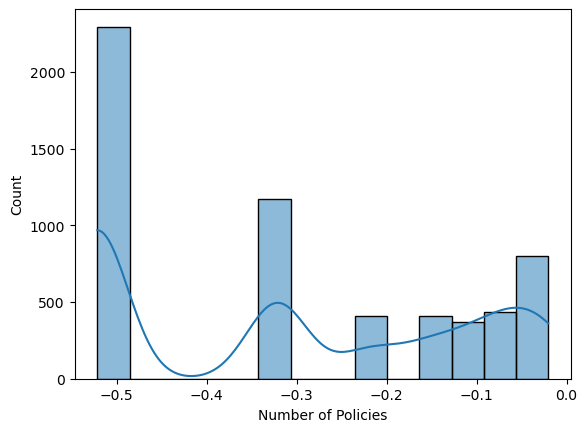

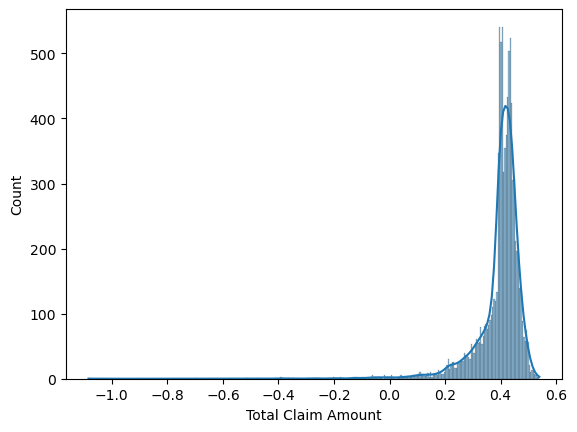

In [56]:
continuous_plots(numericals_log)

In [ ]:
# Changes although not nearer to a normal distribution.